**rajvi using steph's code**

In [10]:
from rajvi_mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium


In [11]:
branches = pd.read_csv('../data/clean/branches.csv')
populationDemographics = pd.read_csv('../data/clean/population_demographics.csv')

In [12]:
api = MapboxAPI()

In [13]:
response = api.get_data((41.97557881655979, -87.71361314512697), 15)
#response

In [14]:
branchRadii = gpd.read_file('../data/clean/branches.csv')

branchRadii[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in branchRadii['LOCATION']]
branchRadii.loc[:, 'LATITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LATITUDE'])
branchRadii.loc[:, 'LONGITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LONGITUDE'])
branchRadii.head()

#for i in range(branchRadii.shape[0]):
#    api_response =  api.get_data((branchRadii.loc[i,'LATITUDE'],branchRadii.loc[i,'LONGITUDE']), 5)
#    branchRadii.loc[i,'geometry'] = shape(api_response)

api_response = api.get_data((branchRadii.loc[0,'LATITUDE'],branchRadii.loc[0,'LONGITUDE']), 5)
branchRadii.loc[0,'geometry'] = shape(api_response)

/tmp/ipykernel_1431650/524419593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_1431650/524419593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


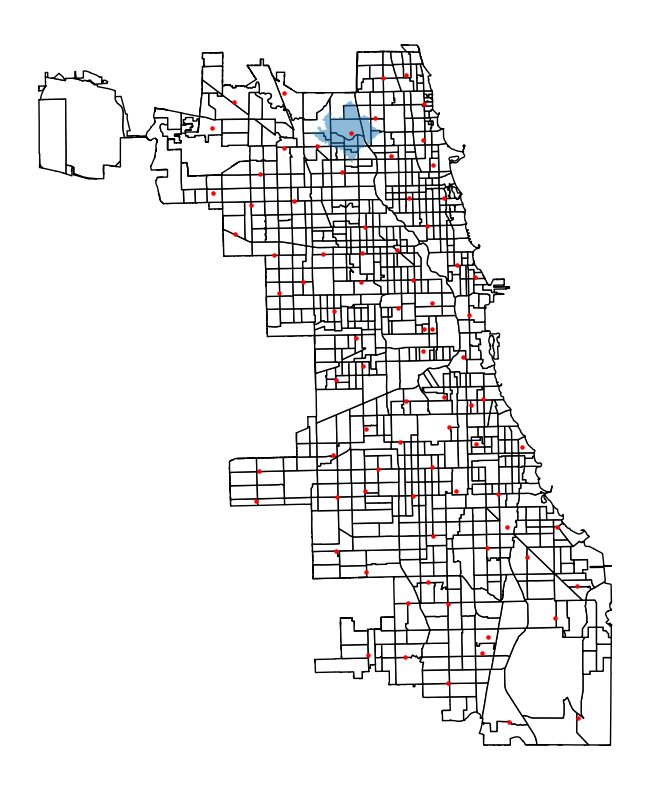

In [15]:
# this line makes a copy of the ageOnly data frame so we can manipulate without affecting our primary dataset
censusTracts = populationDemographics[['geoid','geometry','qualifying name']]
branchLocsOnly=branches[['BRANCH','LOCATION']]

# the following converts the data frame to a geo data frame and plots estimated percent of retired members of each community
censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')
#branchLocsOnly.head()

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")


fig, ax = plt.subplots(1, figsize=(10, 10))
base = censusTracts.plot(ax=ax, color='white', edgecolor='black')
ax.axis('off')

branchRadii.plot(ax=base, alpha = .5)
branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=5);

In [18]:
branchRadii = branchRadii.set_crs('epsg:4326')
print(branchRadii.crs)

epsg:4326


In [20]:
print(censusTracts.shape[0])
censusTracts0to81 = censusTracts.loc[0:82]
censusTracts82to193 = censusTracts.loc[82:194]
censusTracts194to275 = censusTracts.loc[194:276]
censusTracts276to357 = censusTracts.loc[276:358]
censusTracts358to439 = censusTracts.loc[358:440]
censusTracts440to521 = censusTracts.loc[440:522]
censusTracts522to603 = censusTracts.loc[522:604]
censusTracts643to685 = censusTracts.loc[604:686]
censusTracts686to767 = censusTracts.loc[686:768]
censusTracts768to849 = censusTracts.loc[768:850]
censusTracts787to869 = censusTracts.loc[788:870]
censusTracts.head(5)

869


,geoid,qualifying name,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois","POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois","MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."
2,17031740400,"Census Tract 7404, Cook County, Illinois","POLYGON ((-87.72008 41.69127, -87.71937 41.691..."
3,17031740300,"Census Tract 7403, Cook County, Illinois","POLYGON ((-87.72043 41.69857, -87.72007 41.698..."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois","MULTIPOLYGON (((-87.72075 41.70204, -87.72075 ..."


In [ ]:
#branchRadii.intersection(censusTracts787to869, align=True)

for index, row in censusTracts.iterrows():
    #if (branchRadii.intersection(row['geometry']))[0] is not None:
    if ((branchRadii.intersection(row['geometry']))[0]).is_empty:
        empty.append("none")
        empty=[]
    else:
        #print(branchRadii.intersection(row['geometry'])[0])

#test = branchRadii.loc[0:5]
#results = test.intersection(censusTracts.loc[0,'geometry'])
#print(results)
#value = results.loc[0]
#type(value)

In [ ]:
#albanyPark=pd.DataFrame
#albanyPark=
albanyPark = {'tract','geometry'}
albanyPark = geopandas.GeoDataFrame(albanyPark, crs="EPSG:4326")
print(albanyPark)